# Histogram-Based Approach

In [26]:
from matplotlib import pyplot as plt
from utils.edge_extraction import extract_working_region
import cv2
import numpy as np

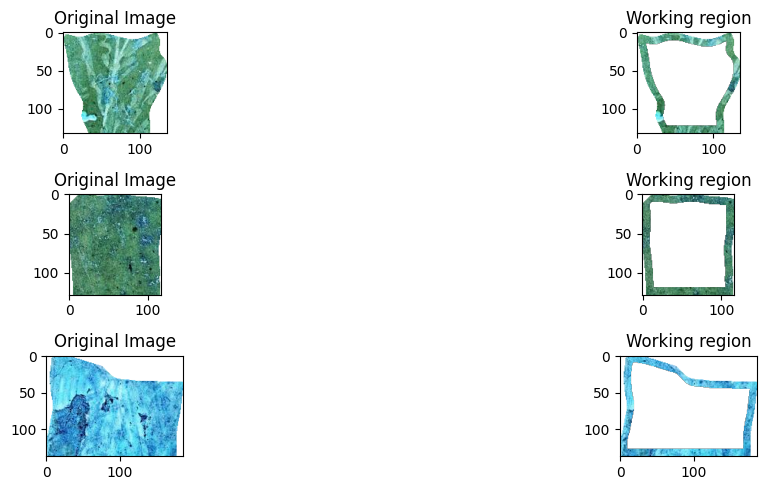

In [27]:
image_green1 = cv2.imread("data/data/5.34.35.png", cv2.IMREAD_UNCHANGED)
image_green2 = cv2.imread("data/data/5.34.36.png", cv2.IMREAD_UNCHANGED)
image_yellow = cv2.imread("data/data/5.34.34.png", cv2.IMREAD_UNCHANGED)

working_region_image_green1 = extract_working_region(image_green1, threshold=10)
working_region_image_green2 = extract_working_region(image_green2, threshold=10)
working_region_image_yellow = extract_working_region(image_yellow, threshold=10)

fig, axes = plt.subplots(3, 2, figsize=(15, 5))
images = [image_green1, working_region_image_green1, image_green2, working_region_image_green2, image_yellow, working_region_image_yellow]
titles = ["Original Image", "Working region"]

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        ax.imshow(images[i * 2 + j])
        ax.set_title(titles[j])

plt.tight_layout()
plt.show()

In [61]:
def get_only_valid_pixels(input_image: np.ndarray) -> np.ndarray:
    # Extract pixels with alpha channel value different from 0
    valid_pixels = input_image[input_image[:, :, 3] != 0]

    # Reshape to (num_pixels, 4)
    reshaped_image = valid_pixels.reshape((-1, 4))

    # Determine the dimensions of the reshaped image
    num_pixels = reshaped_image.shape[0]
    width = int(np.sqrt(num_pixels))
    height = (num_pixels + width - 1) // width

    # Pad the reshaped image to make it rectangular
    padded_image = np.zeros((height * width, 4), dtype=np.uint8)
    padded_image[:num_pixels, :] = reshaped_image

    # Reshape the padded image to the desired dimensions
    final_image = padded_image.reshape((height, width, 4))

    # Split channel
    b, g, r, a = cv2.split(final_image)
    rgb_image = cv2.merge((r, g, b))

    # Show images
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()

    return rgb_image

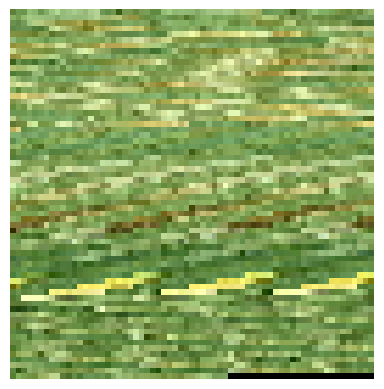

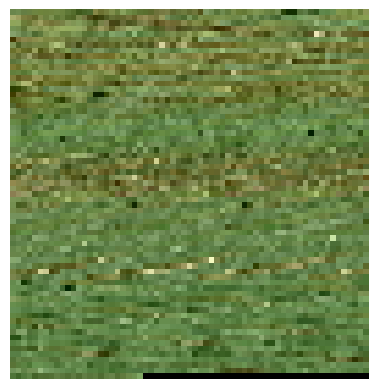

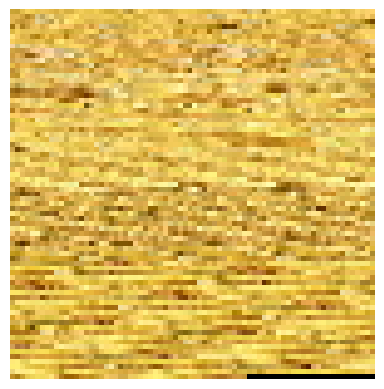

Similarity Score (Green-Green):  0.16
Similarity Score (Green-Yellow):  0.05


In [62]:
hist_img_green1 = cv2.calcHist([get_only_valid_pixels(working_region_image_green1)[:, :]], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_green1, hist_img_green1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img_green2 = cv2.calcHist([get_only_valid_pixels(working_region_image_green2)[:, :]], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_green2, hist_img_green2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img_yellow = cv2.calcHist([get_only_valid_pixels(working_region_image_yellow)[:, :]], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img_yellow, hist_img_yellow, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

cp_green_green = cv2.compareHist(hist_img_green1, hist_img_green2, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green-Green): ", round(cp_green_green, 2))

cp_green_yellow = cv2.compareHist(hist_img_green1, hist_img_yellow, cv2.HISTCMP_CORREL)
print(f"Similarity Score (Green-Yellow): ", round(cp_green_yellow, 2))